<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Homework6_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [3]:
#Check that there are no missing data
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [5]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [6]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.9 MB/s eta 0:00:00


In [7]:
#1)With optuna method and using train data  choose best method among Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier"
#and optimeze these method based on following parameters.
#max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
#max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
#Evaluate performance of the best method on test data using eval function defined above.
#Note: This should be similar to what we have done in the exercises in class. 


import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

def objective(trial):
    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = RandomForestClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = XGBClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features",2,X_train.shape[1])
         classifier_obj = lgb.LGBMClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
       
       
    else:
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         from sklearn.ensemble import GradientBoostingClassifier
         classifier_obj = GradientBoostingClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()
   
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2023-04-14 17:17:10,547] A new study created in memory with name: no-name-7f5d2377-6daf-44c2-a9be-425701c53de0
[I 2023-04-14 17:17:16,762] Trial 0 finished with value: 0.935064935064935 and parameters: {'classifier': 'LightGBM', 'max_depth': 9, 'max_features': 28}. Best is trial 0 with value: 0.935064935064935.
[I 2023-04-14 17:17:19,359] Trial 1 finished with value: 0.932591218305504 and parameters: {'classifier': 'XGBoost', 'max_depth': 6, 'max_features': 8}. Best is trial 0 with value: 0.935064935064935.
[I 2023-04-14 17:17:21,009] Trial 2 finished with value: 0.9174397031539888 and parameters: {'classifier': 'Random Forest', 'max_depth': 11, 'max_features': 14}. Best is trial 0 with value: 0.935064935064935.
[I 2023-04-14 17:17:29,831] Trial 3 finished with value: 0.9094001236858379 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 32, 'max_features': 5}. Best is trial 0 with value: 0.935064935064935.
[I 2023-04-14 17:17:30,233] Trial 4 finished with valu

FrozenTrial(number=60, state=TrialState.COMPLETE, values=[0.9370748299319729], datetime_start=datetime.datetime(2023, 4, 14, 17, 19, 11, 618833), datetime_complete=datetime.datetime(2023, 4, 14, 17, 19, 12, 86589), params={'classifier': 'LightGBM', 'max_depth': 5, 'max_features': 33}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntDistribution(high=34, log=False, low=2, step=1), 'max_features': IntDistribution(high=34, log=False, low=2, step=1)}, trial_id=60, value=None)


In [8]:
study.best_params

{'classifier': 'LightGBM', 'max_depth': 5, 'max_features': 33}

[LightGBM] [Warning] Unknown parameter: max_features
Accuracy: 0.9296536796536796
Precision: 0.9176470588235294
Recall: 0.9069767441860465
None


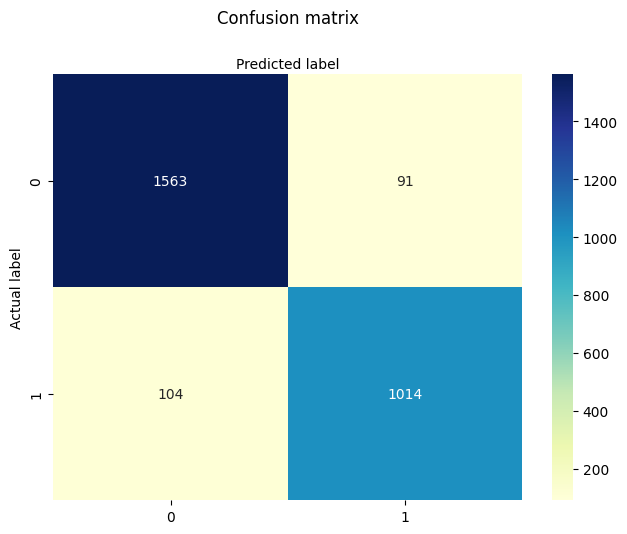

In [9]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=17,max_depth=5,max_features=33)
lgb_model.fit(X_train, y_train)

print(eval(y_test, lgb_model.predict(X_test)))

In [10]:
#2)Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


,Description,Value
0,Session id,1693
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(9240, 35)"
4,Transformed data shape,"(9240, 35)"
5,Transformed train set shape,"(6468, 35)"
6,Transformed test set shape,"(2772, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9368,0.9799,0.9129,0.9225,0.9175,0.8663,0.8665,0.4350
xgboost,Extreme Gradient Boosting,0.9323,0.9785,0.9045,0.9187,0.9114,0.8566,0.8569,0.8300
gbc,Gradient Boosting Classifier,0.9269,0.9771,0.8825,0.9248,0.9028,0.8443,0.8452,1.1630
ada,Ada Boost Classifier,0.9147,0.9696,0.8720,0.9037,0.8872,0.8186,0.8194,0.4840
rf,Random Forest Classifier,0.9120,0.9676,0.8632,0.9045,0.8831,0.8127,0.8135,0.8160
et,Extra Trees Classifier,0.9074,0.9642,0.8528,0.9020,0.8764,0.8025,0.8036,1.4210
dt,Decision Tree Classifier,0.8868,0.8826,0.8592,0.8495,0.8541,0.7617,0.7620,0.1800
lda,Linear Discriminant Analysis,0.8344,0.9018,0.7200,0.8284,0.7701,0.6417,0.6459,0.1410
ridge,Ridge Classifier,0.8336,0.0000,0.7164,0.8292,0.7684,0.6397,0.6441,0.1320
lr,Logistic Regression,0.8284,0.8953,0.7220,0.8123,0.7642,0.6301,0.6331,0.8570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Accuracy: 0.9361471861471862
Precision: 0.9183098591549296
Recall: 0.9157303370786517
None


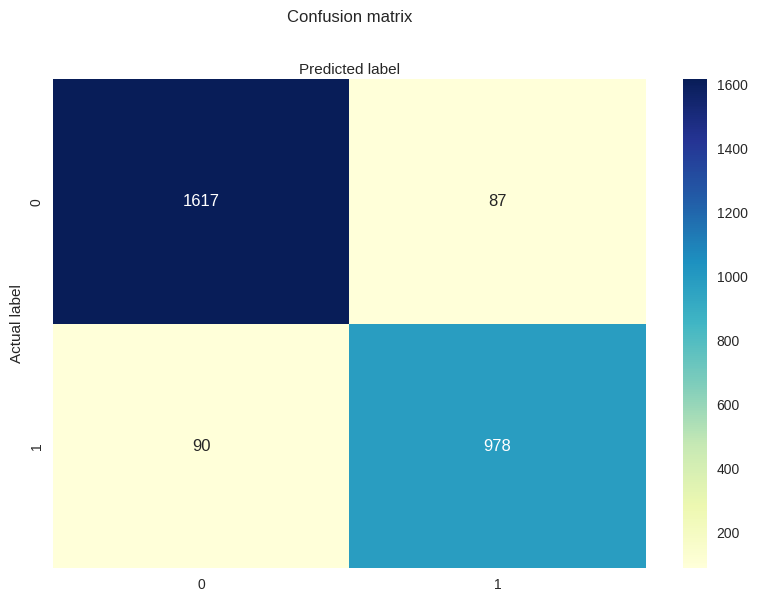

In [20]:
from pycaret.classification import *
# import pycaret

clf = setup(df, target='Converted')

best_model = compare_models()

train_data = get_config('X_train')
train_target = get_config('y_train')
test_data = get_config('X_test')
test_target = get_config('y_test')

predictions = predict_model(best_model, data=test_data)

performance = eval(test_target, predictions['prediction_label'])

print(performance)

In [17]:
#3) Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [22]:
from autogluon.tabular import TabularPredictor

# df_train,df_test=train_test_split(df,test_size=0.33,random_state=1)

train_df = pd.concat([X_train, y_train], axis=1)

# predictor = TabularPredictor(label='Converted')
# predictor.fit(train_data)

predictor= TabularPredictor(label ='Converted').fit(train_data = train_df, verbosity = 2, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230414_175612/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230414_175612/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    6468
Train Data Columns: 34
Label Column: Converted
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preproces

In [23]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.941404       0.589224   60.743481                0.015544           3.675826            2       True         14
1            XGBoost_BAG_L1   0.941095       0.159167   21.218668                0.159167          21.218668            1       True         11
2           LightGBM_BAG_L1   0.940785       0.149851   22.413463                0.149851          22.413463            1       True          4
3      LightGBMLarge_BAG_L1   0.940167       0.367187   31.558282                0.367187          31.558282            1       True         13
4           CatBoost_BAG_L1   0.939703       0.069375   34.165045                0.069375          34.165045            1       True          7
5         LightGBMXT_BAG_L1   0.934756       0.337643   36.401113         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7983920841063699,
  'KNeighborsDist_BAG_L1': 0.8025664811379097,
  'LightGBMXT_BAG_L1': 0.9347557204700062,
  'LightGBM_BAG_L1': 0.9407854050711194,
  'R

In [24]:
predictor.leaderboard(train_df, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr_BAG_L1,0.995362,0.922696,0.432375,0.280929,1.622883,0.432375,0.280929,1.622883,1,True,6
1,RandomForestGini_BAG_L1,0.995362,0.921459,0.482026,0.286786,1.999645,0.482026,0.286786,1.999645,1,True,5
2,ExtraTreesGini_BAG_L1,0.995362,0.910173,0.512805,0.345138,1.683941,0.512805,0.345138,1.683941,1,True,8
3,ExtraTreesEntr_BAG_L1,0.995362,0.911410,0.521353,0.323339,1.326080,0.521353,0.323339,1.326080,1,True,9
4,LightGBMLarge_BAG_L1,0.995207,0.940167,1.949836,0.367187,31.558282,1.949836,0.367187,31.558282,1,True,13
5,KNeighborsDist_BAG_L1,0.994434,0.802566,0.236634,0.410903,0.011949,0.236634,0.410903,0.011949,1,True,2
6,WeightedEnsemble_L2,0.969388,0.941404,1.608966,0.589224,60.743481,0.003710,0.015544,3.675826,2,True,14
7,LightGBM_BAG_L1,0.967687,0.940785,1.171186,0.149851,22.413463,1.171186,0.149851,22.413463,1,True,4
8,XGBoost_BAG_L1,0.966450,0.941095,0.975794,0.159167,21.218668,0.975794,0.159167,21.218668,1,True,11
9,LightGBMXT_BAG_L1,0.965832,0.934756,2.181059,0.337643,36.401113,2.181059,0.337643,36.401113,1,True,3


Accuracy: 0.9307359307359307
Precision: 0.9287037037037037
Recall: 0.8971377459749553
None


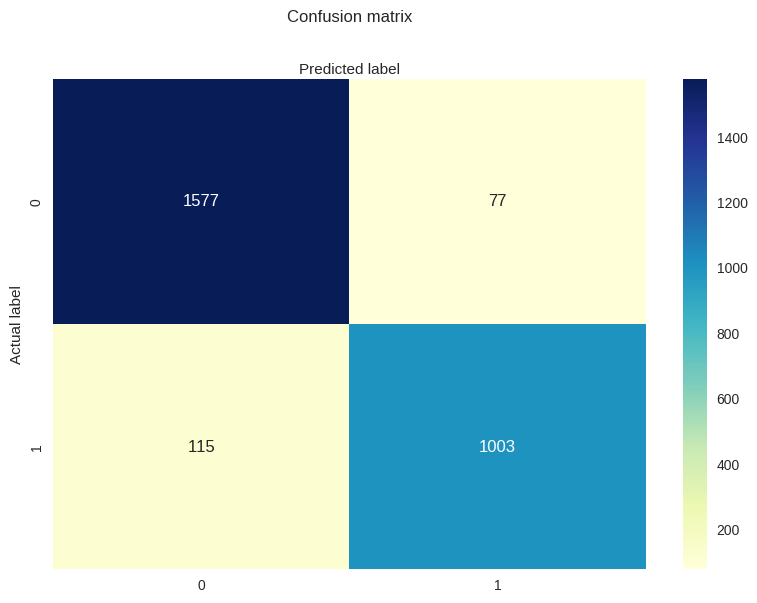

In [25]:
y_pred = predictor.predict(X_test)

performance = eval(y_test,y_pred)

print(performance)